In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock  = 'GOOG' 

data = yf.download(stock, start, end)

C:\Users\Pial\AppData\Local\Temp\ipykernel_10560\3491760051.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...
2022-12-14,94.746796,96.645513,93.384896,94.975440,26452900
2022-12-15,90.661087,93.474366,89.895640,92.987264,28298800


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,GOOG,GOOG,GOOG,GOOG,GOOG
0,0,2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
1,1,2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2,2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...,...
2756,2756,2022-12-14,94.746796,96.645513,93.384896,94.975440,26452900
2757,2757,2022-12-15,90.661087,93.474366,89.895640,92.987264,28298800
2758,2758,2022-12-16,90.323112,91.207853,89.478137,90.661100,48485500


In [7]:
ma_100_days = data.Close.rolling(100).mean()

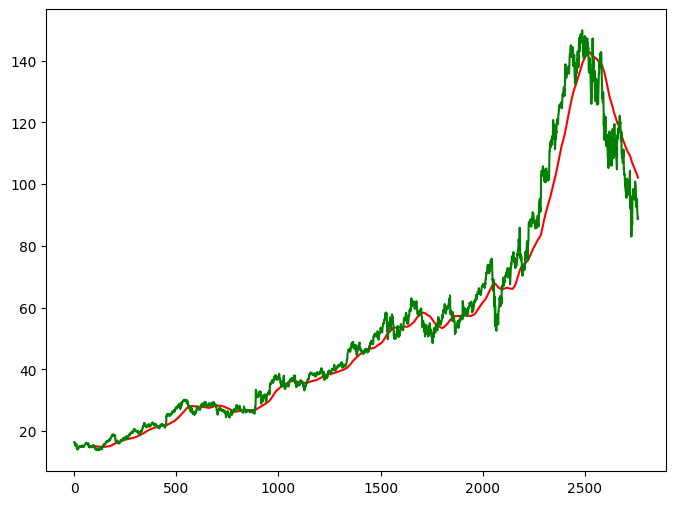

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

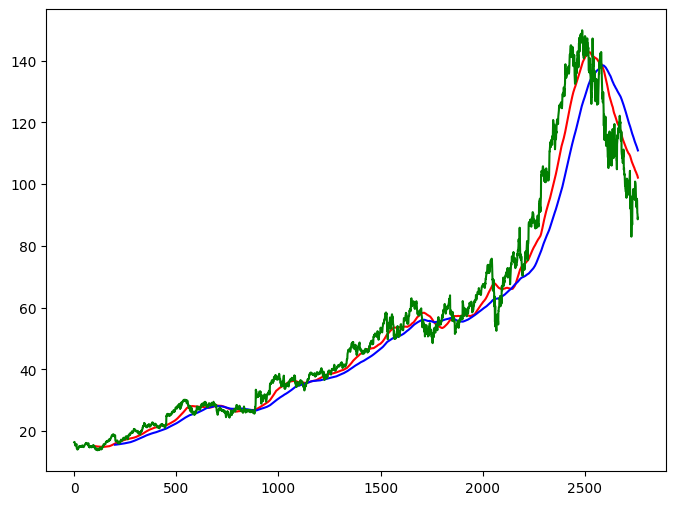

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

2208

In [14]:
data_test.shape[0]


553

In [15]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0156 - mae: 0.0979 - val_loss: 0.0332 - val_mae: 0.1763
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0035 - mae: 0.0427 - val_loss: 0.0090 - val_mae: 0.0858
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014 - mae: 0.0241 - val_loss: 0.0059 - val_mae: 0.0675
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - mae: 0.0222 - val_loss: 0.0057 - val_mae: 0.0672
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0015 - mae: 0.0243 - val_loss: 0.0045 - val_mae: 0.0586
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - mae: 0.0225 - val_loss: 0.0051 - val_mae: 0.0629
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0013 - mae: 0.0216 - val_loss: 0.0046 - val_mae: 0.0594
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - mae: 0.0227 - val_loss: 0.0047 - val_mae: 0.0602
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.001

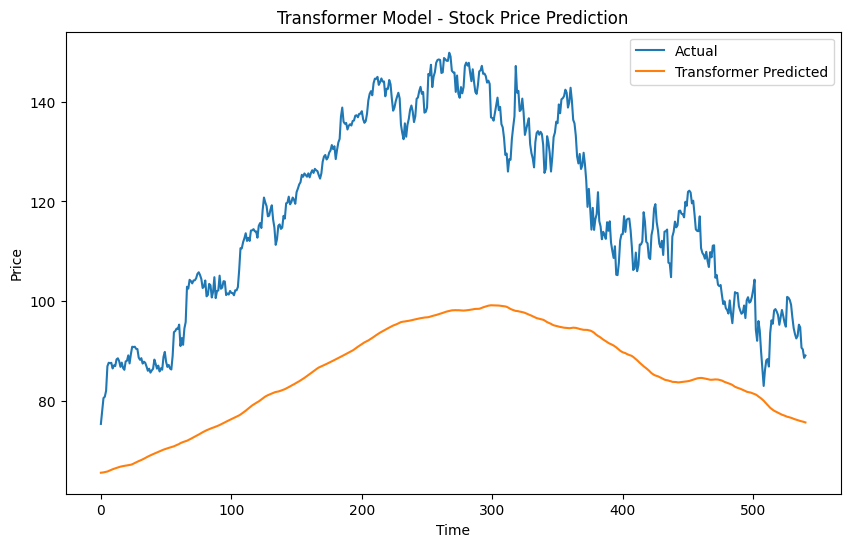

In [16]:

# ====================== Transformer Model for Stock Prediction ======================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Prepare data for Transformer (same sequence_length as your LSTM)
sequence_length = 60

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

close_prices = data['Close'].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices.reshape(-1, 1))

X_trans, y_trans = create_sequences(scaled_close, sequence_length)

# Train-test split
split = int(len(X_trans) * 0.8)
X_train_t, X_test_t = X_trans[:split], X_trans[split:]
y_train_t, y_test_t = y_trans[:split], y_trans[split:]

# Transformer Encoder block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# Build the model
inputs = keras.Input(shape=(sequence_length, 1))
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1)(x)

transformer_model = keras.Model(inputs, outputs)

transformer_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history_t = transformer_model.fit(X_train_t, y_train_t, validation_split=0.2, epochs=20, batch_size=32)

# Predictions
pred_t = transformer_model.predict(X_test_t)
pred_t_rescaled = scaler.inverse_transform(pred_t)
y_test_t_rescaled = scaler.inverse_transform(y_test_t.reshape(-1,1))

# Plot results
plt.figure(figsize=(10,6))
plt.plot(y_test_t_rescaled, label="Actual")
plt.plot(pred_t_rescaled, label="Transformer Predicted")
plt.title("Transformer Model - Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x = [] 
y = [] 

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [19]:
x, y = np.array(x), np.array(y)

In [20]:
from keras.layers import Input, LSTM, Dense, Bidirectional, Layer, MultiHeadAttention, LayerNormalization, Dropout
from keras.models import Sequential 
import tensorflow as tf

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
                input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


C:\Users\Pial\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size = 32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.0708
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0083
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0063
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0054
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0052
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0042
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0047
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0048
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0042
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0042
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0038
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0033
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0038
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0033
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0032
Epoc

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [67]:
pas_100_days = data_train.tail(100)

In [68]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [69]:
data_test_scale = scaler.fit_transform(data_test)

In [70]:
x = [] 
y = [] 

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [71]:
y_predict = model.predict(x)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [72]:
scale =1/scaler.scale_

In [73]:
y_predict = y_predict*scale

In [74]:
y = y*scale

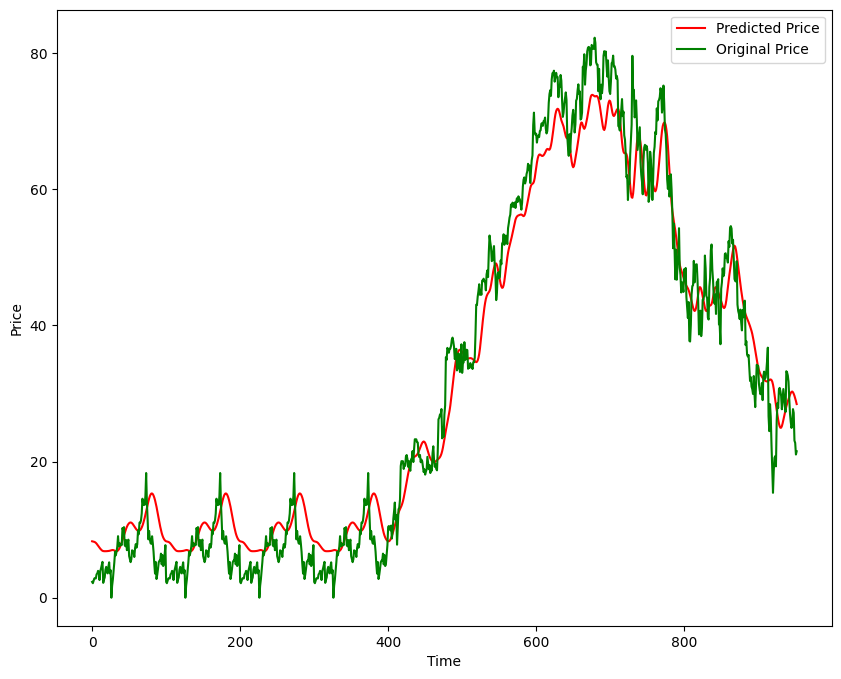

In [75]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [76]:
model.save('LSTM model.keras')

In [77]:
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [78]:
data_close = data[['Close']].copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_close)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)
    

In [79]:
seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

X = X.reshape((X.shape[0], X.shape[1], 1))



In [80]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [81]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer, Input, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [82]:
class Attention(Layer):
  
    def __init__(self, return_attention=False, **kwargs):
        super().__init__(**kwargs)
        self.return_attention = return_attention
        self.attention_scores = None  # cache for inspection

    def build(self, input_shape):
        # input_shape = (batch, timesteps, features)
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True,
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(1,),
            initializer="zeros",
            trainable=True,
        )
        super().build(input_shape)

    def call(self, x):
        # x: (batch, timesteps, features)
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)  # (batch, timesteps)
        alpha = K.softmax(e)
        self.attention_scores = alpha
        alpha_expanded = K.expand_dims(alpha, axis=-1)
        context = x * alpha_expanded
        context = K.sum(context, axis=1)
        return context

    def get_config(self):
        cfg = super().get_config()
        cfg.update({"return_attention": self.return_attention})
        return cfg
 

In [83]:
seq_len = X_train.shape[1]
inputs = Input(shape=(seq_len, 1), name="input_window")

x = Bidirectional(LSTM(50, return_sequences=True), name="bilstm_1")(inputs)
x = Dropout(0.2, name="dropout_1")(x)

x = Bidirectional(LSTM(50, return_sequences=True), name="bilstm_2")(x)
x = Dropout(0.2, name="dropout_2")(x)

x = Attention(name="attention")(x)  # returns context vector

outputs = Dense(1, name="price_out")(x)

bi_lstm_att_model = Model(inputs=inputs, outputs=outputs, name="BiLSTM_Attention")

In [84]:
bi_lstm_att_model.compile(optimizer="adam", loss="mean_squared_error")

history_att = bi_lstm_att_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.3716e-04 - val_loss: 0.0043
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.3693e-04 - val_loss: 0.0044
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.7462e-04 - val_loss: 0.0037
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.7194e-04 - val_loss: 0.0036
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0778e-04 - val_loss: 0.0035
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3706e-04 - val_loss: 0.0038
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.9752e-04 - val_loss: 0.0033
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.2692e-04 - val_loss: 0.0062
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.1859e-04 - val_loss: 0.0037
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.8179e-04 - val_loss: 0.0043
Epoch 12/20
68/68 ━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


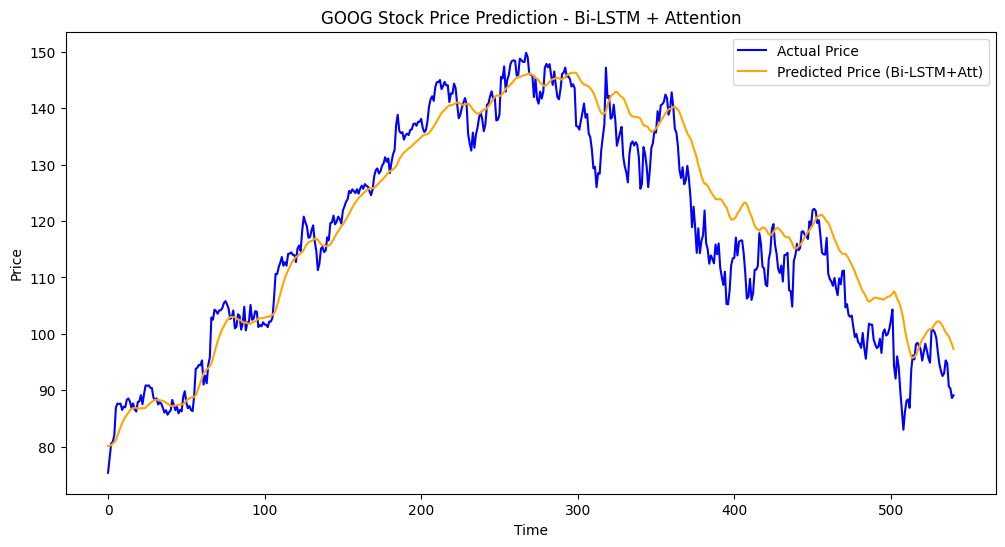

In [87]:
pred_att = bi_lstm_att_model.predict(X_test)
pred_att_prices = scaler.inverse_transform(pred_att.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(real_prices, label="Actual Price", color="blue")
plt.plot(pred_att_prices, label="Predicted Price (Bi-LSTM+Att)", color="orange")
plt.title(f"{stock} Stock Price Prediction - Bi-LSTM + Attention")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [88]:
future_days = 100
last_sequence = scaled_data[-seq_length:]
predictions = []

for _ in range(future_days):
    input_seq = last_sequence.reshape(1, seq_length, 1)
    
    pred = model.predict(input_seq)[0][0]
    predictions.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

future_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

In [89]:
full_actual = data_close.values
full_dates = data['Date'].tolist() if 'Date' in data.columns else data.index.tolist()


In [90]:
from datetime import timedelta
last_date = pd.to_datetime(full_dates[-1])
future_dates = [last_date + timedelta(days=i+1) for i in range(future_days)]

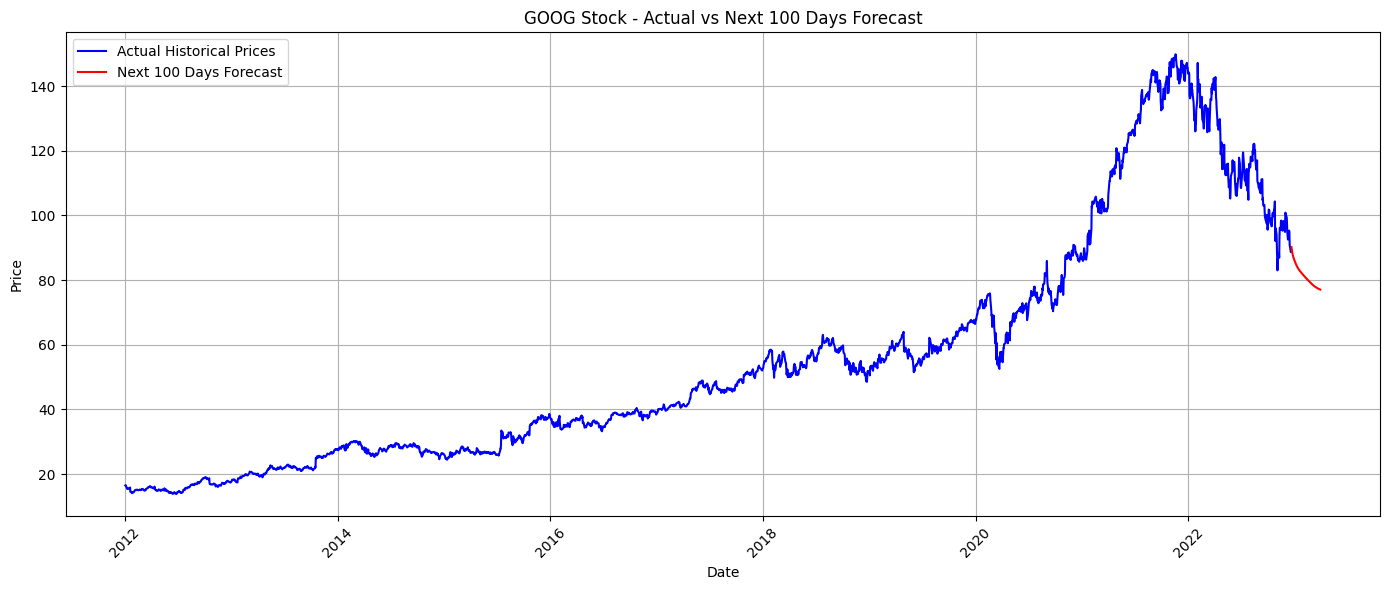

In [91]:
plt.figure(figsize=(14, 6))
plt.plot(full_dates, full_actual, label='Actual Historical Prices', color='blue')
plt.plot(future_dates, future_prices, label='Next 100 Days Forecast', color='red')
plt.title(f'{stock} Stock - Actual vs Next 100 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [92]:
bi_lstm_att_model.save('bi_lstm_attention_model.keras')


In [93]:
from tensorflow.keras import layers, models

In [94]:
def transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.2):
    x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    ffn = layers.Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(x)
    ffn = layers.Dropout(dropout)(ffn)
    ffn = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(ffn)
    return layers.LayerNormalization(epsilon=1e-6)(ffn + x)

In [95]:
def build_transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = transformer_encoder(inputs)
    x = transformer_encoder(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='linear')(x)  # <- FIXED INDENTATION HERE
    return models.Model(inputs, outputs, name="ImprovedTransformer")


In [96]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [97]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [98]:
scaler = MinMaxScaler()
scaler.fit(y_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [99]:
transformer_model = build_transformer_model((X_train.shape[1], 1))
transformer_model.compile(optimizer='adam', loss='mean_squared_error')
transformer_model.summary()

Model: "ImprovedTransformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 60, 1)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_2        │ (None, 60, 1)             │           1,793 │ input_layer_2[0][0],       │
│ (MultiHeadAttention)          │                           │                 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_13 (Dropout)          │ (None, 60, 1)             │               0 │ multi_head_attention_2[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_4 (Add)                   │ (None, 60, 1)             │               0 │ dropout_13[0][0],          │
│                               │                           │                 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_4         │ (None, 60, 1)             │               2 │ add_4[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_4 (Conv1D)             │ (None, 60, 128)           │             256 │ layer_normalization_4[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_14 (Dropout)          │ (None, 60, 128)           │               0 │ conv1d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_5 (Conv1D)             │ (None, 60, 1)             │             129 │ dropout_14[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_5 (Add)                   │ (None, 60, 1)             │               0 │ conv1d_5[0][0],            │
│                               │                           │                 │ layer_normalization_4[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_5         │ (None, 60, 1)             │               2 │ add_5[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_3        │ (None, 60, 1)             │           1,793 │ layer_normalization_5[0][… │
│ (MultiHeadAttention)          │                           │                 │ layer_normalization_5[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_16 (Dropout)          │ (None, 60, 1)             │               0 │ multi_head_attention_3[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_6 (Add)                   │ (None, 60, 1)             │               0 │ dropout_16[0][0],          │
│                               │                           │                 │ layer_normalization_5[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_6         │ (None, 60, 1)             │               

 Total params: 4,749 (18.55 KB)

 Trainable params: 4,749 (18.55 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history_transformer = transformer_model.fit(
    X_train, y_train,
    epochs=50,  # Increased from 20
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0497 - val_loss: 0.5074
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0305 - val_loss: 0.4395
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0208 - val_loss: 0.3940
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0170 - val_loss: 0.3663
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0173 - val_loss: 0.3511
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - val_loss: 0.3446
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - val_loss: 0.3419
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0156 - val_loss: 0.3403
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0161 - val_loss: 0.3383
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - val_loss: 0.3405
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - val_loss: 0.3406
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0

In [101]:
y_pred_transformer = transformer_model.predict(X_test)
y_pred_transformer_inv = scaler.inverse_transform(y_pred_transformer)
y_test_inv = scaler.inverse_transform(y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


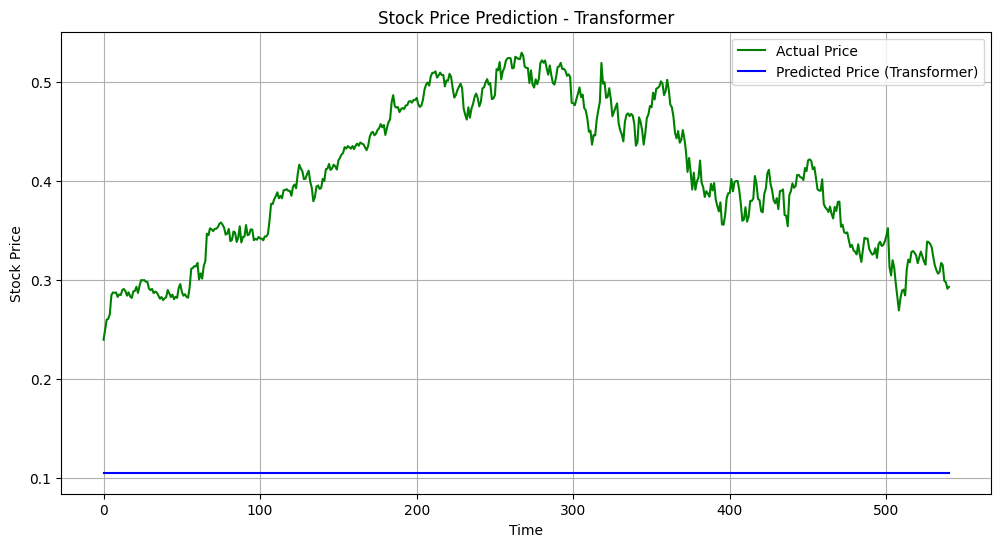

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, color="green", label="Actual Price")
plt.plot(y_pred_transformer_inv, color="blue", label="Predicted Price (Transformer)")
plt.title("Stock Price Prediction - Transformer")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()